In [1]:
# Dependency imports
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# Notebook customizations
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_colwidth = -1

### Properties EDA

In [2]:
properties_df = pd.read_csv("./output/engineered_trulia_properties.csv", sep="|", dtype={'zip_code': str}, encoding="latin1")
properties_df

,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
0,160 162 Old Peckslip Rd,1352.0,NaN,1985,Holmes,NaN,NaN,32234.4,3.0,3.0,NaN,NaN,NaN,Multi-Family,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,NY,7718.79,0,12531
1,10 Cliff Ct,1184.0,NaN,1997,Holmes,NaN,NaN,60984.0,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,NaN,1992,Holmes,NaN,NaN,110206.8,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
3,3130 Grand Concourse #7R,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7r-bronx-ny-10458--2171936520,NY,NaN,2017,10468
4,3130 Grand Concourse #7S,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7s-bronx-ny-10458--2333495270,NY,NaN,2017,10458
5,3130 Grand Concourse #7P,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7p-bronx-ny-10458--2173798637,NY,NaN,2017,10458
6,3130 Grand Concourse #7N,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7n-bronx-ny-10458--2345496753,NY,NaN,2017,10458
7,3184 Grand Concourse #4E,80811.0,NaN,1965,Bronx,NaN,NaN,16552.8,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3184-grand-concourse-4e-bronx-ny-10458--2345502809,NY,NaN,2017,10458
8,4 Wheel Dr,NaN,NaN,0,Craryville,NaN,NaN,174240.0,NaN,NaN,NaN,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,NY,1509.69,2017,12521
9,Winding Ln,NaN,NaN,0,Craryville,NaN,NaN,7405.0,NaN,NaN,NaN,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/winding-ln-craryville-ny-12521--2158446526,NY,31.29,2017,12521


In [3]:
# Dropping columns that do not have any value for now
properties_df.drop(axis=0, inplace=True, columns=['basement_type', 'exterior_type', 'heating_type', 'no_of_parking_spaces', 'no_of_stories', 'parking_type'])
properties_df

,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,property_url,state,tax_amount,tax_year,zip_code
0,160 162 Old Peckslip Rd,1352.0,1985,Holmes,32234.4,3.0,3.0,Multi-Family,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,NY,7718.79,0,12531
1,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,1992,Holmes,110206.8,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
3,3130 Grand Concourse #7R,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7r-bronx-ny-10458--2171936520,NY,NaN,2017,10468
4,3130 Grand Concourse #7S,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7s-bronx-ny-10458--2333495270,NY,NaN,2017,10458
5,3130 Grand Concourse #7P,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7p-bronx-ny-10458--2173798637,NY,NaN,2017,10458
6,3130 Grand Concourse #7N,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7n-bronx-ny-10458--2345496753,NY,NaN,2017,10458
7,3184 Grand Concourse #4E,80811.0,1965,Bronx,16552.8,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3184-grand-concourse-4e-bronx-ny-10458--2345502809,NY,NaN,2017,10458
8,4 Wheel Dr,NaN,0,Craryville,174240.0,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,NY,1509.69,2017,12521
9,Winding Ln,NaN,0,Craryville,7405.0,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/winding-ln-craryville-ny-12521--2158446526,NY,31.29,2017,12521


In [4]:
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95848 entries, 0 to 95847
Data columns (total 13 columns):
address           95848 non-null object
area_sqft         61567 non-null float64
built_year        95848 non-null int64
city              95845 non-null object
lot_size          88123 non-null float64
no_of_baths       53205 non-null float64
no_of_bedrooms    47393 non-null float64
property_type     95848 non-null object
property_url      95848 non-null object
state             95845 non-null object
tax_amount        29468 non-null float64
tax_year          95848 non-null int64
zip_code          95845 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 9.5+ MB


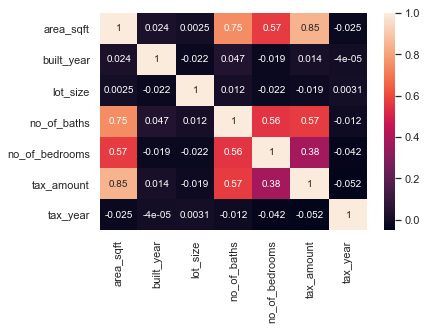

In [5]:
sns.heatmap(data=properties_df.corr(), annot=True)

### High and medium correlated features from Properties

* area_sqft vs. tax_amount (0.85)
* area_sqft vs. no_of_baths (0.75)
* no_of_baths vs. tax_amount (0.57)
* area_sqft vs. no_of_bedrooms (0.57)
* no_of_bedrooms vs no_of_baths (0.56)

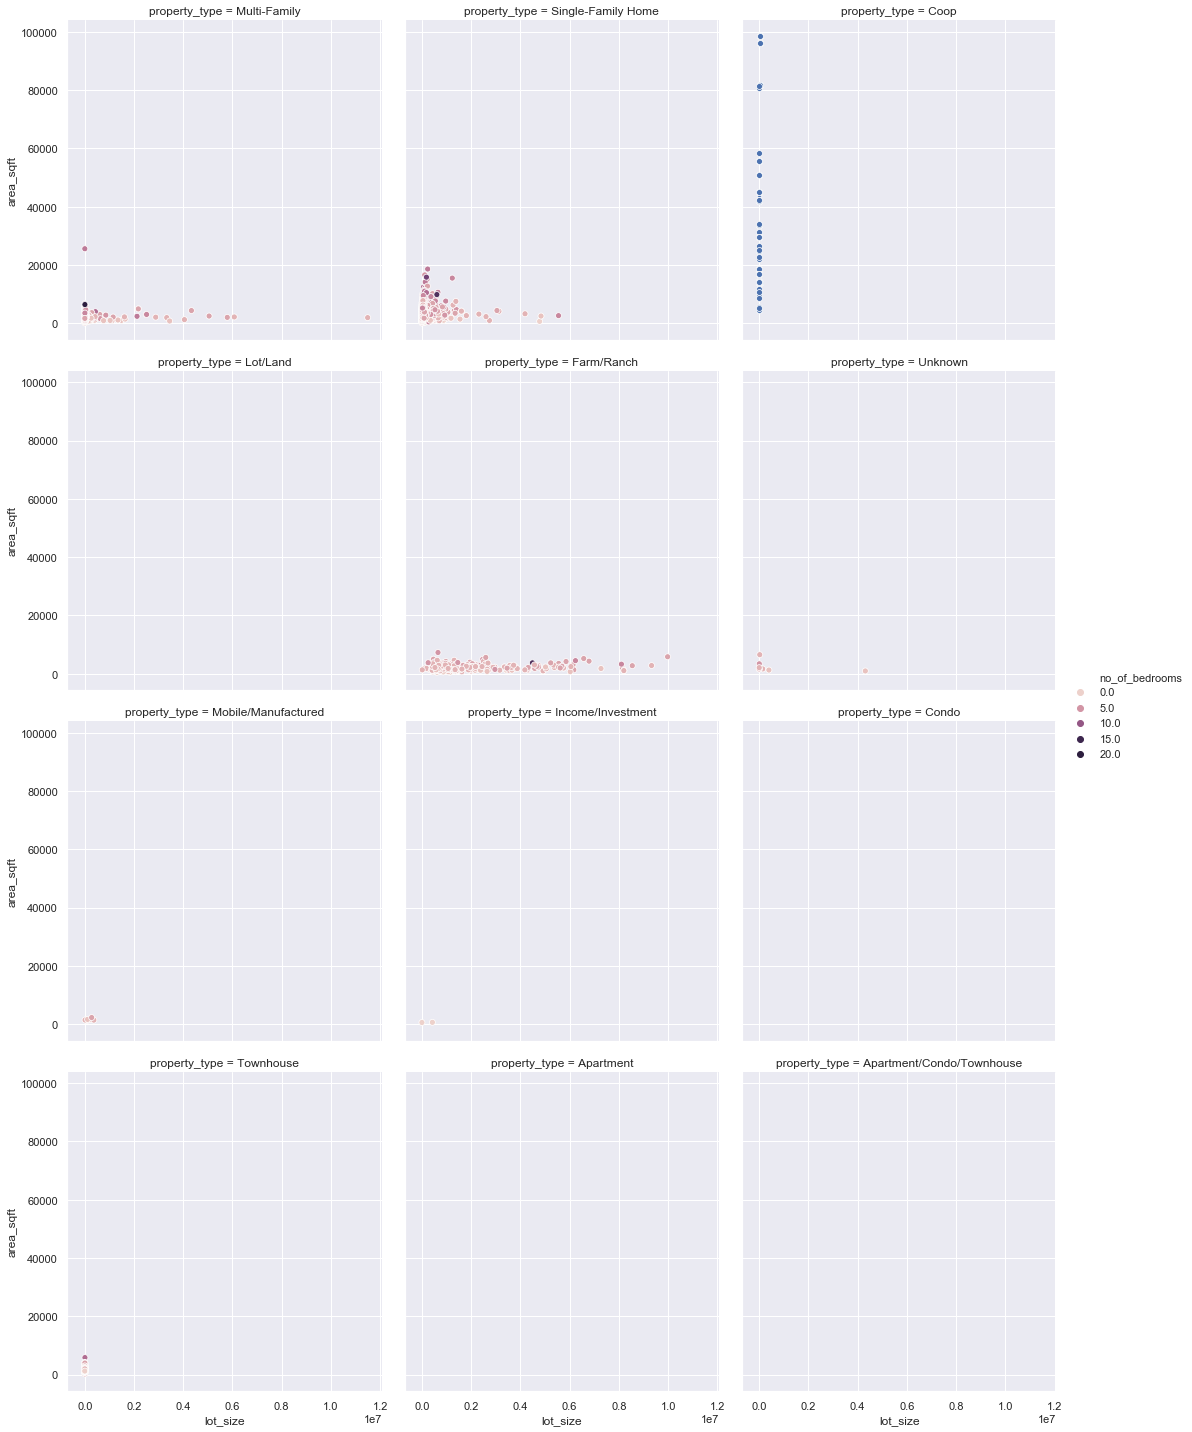

In [6]:
sns.relplot(data=properties_df, x='lot_size', y='area_sqft', hue="no_of_bedrooms", col="property_type", col_wrap=3)

### Transactions EDA

In [7]:
transactions_df = pd.read_csv("./output/engineered_trulia_transactions.csv", sep="|", encoding="latin1")
transactions_df

,contract_date,county_transfer_tax,document_type,price,property_url,recording_date,total_transfer_tax,transaction_type
0,1995-11-17,NaN,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,1995-12-12,NaN,Purchase/Resale Arm's Length Residential Transaction
1,2001-06-25,NaN,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,2001-07-30,NaN,Purchase/Resale Arm's Length Residential Transaction
2,2013-09-19,NaN,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2013-09-19,NaN,Insured Non-Residential Grant Deed
3,2006-12-28,NaN,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2007-01-03,NaN,Insured Non-Residential Grant Deed
4,2018-11-08,NaN,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2018-11-27,NaN,Purchase/Resale Arm's Length Residential Transaction
5,2016-08-12,NaN,Deed,122000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2016-08-15,NaN,Purchase/Resale Arm's Length Residential Transaction
6,2004-07-21,NaN,Deed,130000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2004-07-21,NaN,Purchase/Resale Arm's Length Residential Transaction
7,1998-08-27,NaN,Deed,385000.0,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,1998-08-28,NaN,Non-Arm's Length Transaction
8,2009-04-17,NaN,Deed,437500.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2009-04-17,NaN,Purchase/Resale Arm's Length Residential Transaction
9,2004-03-08,NaN,Deed,363750.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2004-03-09,NaN,Insured Non-Residential Grant Deed


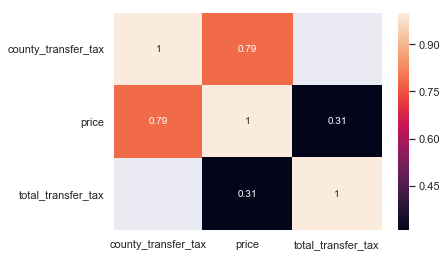

In [9]:
sns.heatmap(data=transactions_df.corr(), annot=True)

### High and medium correlated features from Transactions

* price vs. county_transfer_tax (0.79)

### Enriching transactions data with properties data

In [8]:
transactions_en_df = pd.merge(transactions_df, properties_df, how='left', on=['property_url'])
transactions_en_df

,contract_date,county_transfer_tax,document_type,price,property_url,recording_date,total_transfer_tax,transaction_type,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,state,tax_amount,tax_year,zip_code
0,1995-11-17,NaN,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,1995-12-12,NaN,Purchase/Resale Arm's Length Residential Transaction,160 162 Old Peckslip Rd,1352.0,1985.0,Holmes,32234.4,3.0,3.0,Multi-Family,NY,7718.79,0.0,12531
1,2001-06-25,NaN,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,2001-07-30,NaN,Purchase/Resale Arm's Length Residential Transaction,10 Cliff Ct,1184.0,1997.0,Holmes,60984.0,2.5,3.0,Single-Family Home,NY,8320.40,2017.0,12531
2,2013-09-19,NaN,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2013-09-19,NaN,Insured Non-Residential Grant Deed,4 Wheel Dr,NaN,0.0,Craryville,174240.0,NaN,NaN,Lot/Land,NY,1509.69,2017.0,12521
3,2006-12-28,NaN,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2007-01-03,NaN,Insured Non-Residential Grant Deed,4 Wheel Dr,NaN,0.0,Craryville,174240.0,NaN,NaN,Lot/Land,NY,1509.69,2017.0,12521
4,2018-11-08,NaN,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2018-11-27,NaN,Purchase/Resale Arm's Length Residential Transaction,10 Wang Dr,960.0,1970.0,Craryville,23958.0,1.0,3.0,Single-Family Home,NY,3186.94,0.0,12521
5,2016-08-12,NaN,Deed,122000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2016-08-15,NaN,Purchase/Resale Arm's Length Residential Transaction,10 Wang Dr,960.0,1970.0,Craryville,23958.0,1.0,3.0,Single-Family Home,NY,3186.94,0.0,12521
6,2004-07-21,NaN,Deed,130000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2004-07-21,NaN,Purchase/Resale Arm's Length Residential Transaction,10 Wang Dr,960.0,1970.0,Craryville,23958.0,1.0,3.0,Single-Family Home,NY,3186.94,0.0,12521
7,1998-08-27,NaN,Deed,385000.0,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,1998-08-28,NaN,Non-Arm's Length Transaction,126 Taghkanic Churchtown Rd,2775.0,1992.0,Craryville,510087.6,2.5,3.0,Farm/Ranch,NY,12348.22,2017.0,12521
8,2009-04-17,NaN,Deed,437500.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2009-04-17,NaN,Purchase/Resale Arm's Length Residential Transaction,110 Taghkanic Churchtown Rd,1619.0,2003.0,Craryville,384199.2,2.0,2.0,Single-Family Home,NY,10644.01,2017.0,12521
9,2004-03-08,NaN,Deed,363750.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2004-03-09,NaN,Insured Non-Residential Grant Deed,110 Taghkanic Churchtown Rd,1619.0,2003.0,Craryville,384199.2,2.0,2.0,Single-Family Home,NY,10644.01,2017.0,12521
